In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
train = pd.read_csv("Training.csv")

In [ ]:
test = pd.read_csv("Testing.csv")

In [ ]:
train.drop("Unnamed: 133",axis=1,inplace=True)

In [ ]:
train.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [ ]:
train.isnull().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

In [ ]:
test.isnull().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

In [ ]:
le.fit(train["prognosis"])

LabelEncoder()

In [ ]:
X_train = train.drop("prognosis",axis=1).values
y_train = le.transform(train["prognosis"])

In [ ]:
X_test = test.drop("prognosis",axis=1).values
y_test = le.transform(test["prognosis"])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout,Dense

In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(256,activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(41,activation="softmax"))

In [ ]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
earlystop = EarlyStopping(monitor="val_loss",mode="min",verbose=1,patience=10)

In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,callbacks=[earlystop])

Epoch 1/100
154/154 [==============================] - 1s 2ms/step - loss: 2.5394 - accuracy: 0.3262 - val_loss: 0.3467 - val_accuracy: 0.9762
Epoch 2/100
154/154 [==============================] - 0s 2ms/step - loss: 0.6539 - accuracy: 0.8138 - val_loss: 0.1041 - val_accuracy: 0.9762
Epoch 3/100
154/154 [==============================] - 0s 2ms/step - loss: 0.3014 - accuracy: 0.9110 - val_loss: 0.1448 - val_accuracy: 0.9762
Epoch 4/100
154/154 [==============================] - 0s 1ms/step - loss: 0.2152 - accuracy: 0.9378 - val_loss: 0.0952 - val_accuracy: 0.9762
Epoch 5/100
154/154 [==============================] - 0s 2ms/step - loss: 0.1466 - accuracy: 0.9520 - val_loss: 0.1124 - val_accuracy: 0.9762
Epoch 6/100
154/154 [==============================] - 0s 2ms/step - loss: 0.1283 - accuracy: 0.9600 - val_loss: 0.1332 - val_accuracy: 0.9762
Epoch 7/100
154/154 [==============================] - 0s 2ms/step - loss: 0.1053 - accuracy: 0.9667 - val_loss: 0.1474 - val_accuracy: 0.9762

Text(0.5, 1.0, 'Train and Validation')

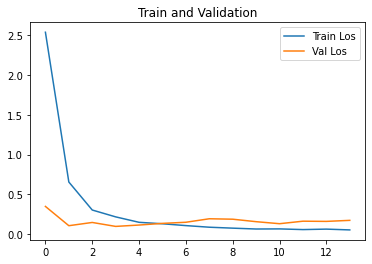

In [ ]:
loss=model.history.history['loss']
val_loss=model.history.history['val_loss']

plt.plot(range(14),loss,label='Train Los')
plt.plot(range(14),val_loss,label='Val Los')
plt.legend(loc='upper right')
plt.title('Train and Validation')

In [ ]:
model.save("trainedModel.h5")